# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Цели проекта
- Определить существует ли зависимость возврата кредита в срок от семейного и финансового положения, цели получения кредита и количества детей;
- Рассчитать среднюю долю должников в каждой категории;
- Сформулировать вывод о надежности заемщиков.

## Описание данных
`children` — количество детей в семье \
`days_employed` — общий трудовой стаж в днях \
`dob_years` — возраст клиента в годах \
`education` — уровень образования клиента \
`education_id` — идентификатор уровня образования \
`family_status` — семейное положение \
`family_status_id` — идентификатор семейного положения \
`gender` — пол клиента \
`income_type` — тип занятости \
`debt` — имел ли задолженность по возврату кредитов \
`total_income` — ежемесячный доход \
`purpose` — цель получения кредита.

## План работы
1. Изучить данные
2. Обработать данные 
3. Категоризировать данные
4. Сделать вывод

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


*Вывод*: Открыв данные и изучив их структуру, мы обнаружили пропуски в колонках `days_employed` и `total_income`, в следующем шаге исправим это несовпадение в данных.

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


*Общий вывод по разделу 5*: В данном разделе мы удалили пропуски, обработали аномальные значения и дубликаты, изменили тип данных в столбце `total_income` и категоризировали данные для удобства дальнейшей работы.

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Создадим сводную таблицу, показывающую зависимость возврата кредита в срок от количества детей. Для этого в index укажем столбец по которому необходимо сделать группировку - children, а в values столбец по которому будут производиться расчеты - debt, агрументом для атрибута aggfunc служит список функций, которые будут применены к столбцу в values. Выведем таблицу на экран.

In [22]:
pivot_children = pd.pivot_table(data, index = ['children'], values = 'debt', aggfunc = ['sum','count','mean'])
pivot_children

,sum,count,mean
,debt,debt,debt
children,,,
0,1063,14091,0.075438
1,444,4808,0.092346
2,194,2052,0.094542
3,27,330,0.081818
4,4,41,0.097561
5,0,9,0.000000


In [31]:
#Код ревьюера
data.pivot_table(index = 'children', values = 'debt', aggfunc = ['count', 'sum', 'mean'])\
    .sort_values(by = ('mean', 'debt'), ascending = False)

,count,sum,mean
,debt,debt,debt
children,,,
4,41,4,0.097561
2,2052,194,0.094542
1,4808,444,0.092346
3,330,27,0.081818
0,14091,1063,0.075438
5,9,0,0.000000


Мы создали таблицу зависимости возврата кредита в срок от количества детей. Для более наглядного изображения таблицы, удалим мультииндекс и переименуем название столбцов. Обновленную таблицу выведем на экран.

In [23]:
pivot_children = pivot_children.droplevel(1,axis = 1)
pivot_children = pivot_children.rename(columns = {'sum':'Всего должников','count':'Всего кредитополучателей','mean':'Доля должников'})
pivot_children.index.rename('Количество детей', inplace = True)
pivot_children

,Всего должников,Всего кредитополучателей,Доля должников
Количество детей,,,
0,1063,14091,0.075438
1,444,4808,0.092346
2,194,2052,0.094542
3,27,330,0.081818
4,4,41,0.097561
5,0,9,0.000000


Сравним данные, где у семей нет детей и в семье есть один или два ребенка, это поможет получить нам общую информацию об отличие платежеспособности семей без детей и семей которые имеют детей.

In [24]:
pivot_children.head(3)

,Всего должников,Всего кредитополучателей,Доля должников
Количество детей,,,
0,1063,14091,0.075438
1,444,4808,0.092346
2,194,2052,0.094542


**Вывод:** 

Теперь мы можем сделать вывод, что зависимость возврата кредита в срок от количества детей действительно существует. Так семьи, в которых 5 детей, всегда возвращают кредит в срок, но количество кредитополучателей с 5 детьми очень отличается от кредитополучателей с другим количеством детей. Поэтому возьмём выборку из предыдущего шага и посмотрим, что в семьях без детей всего 7 % должников, а в семьях, где есть дети этот процент увеличивается до 9%, но это не означает, что семьям с детьми не следует выдавать кредиты, просто у семей с детьми больше финансовых затрат, нежели у семей без детей.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Выше мы выясняли зависимость возврата кредита в срок от количества детей, по аналогии посчитаем следующие показатели.

In [25]:
pivot_family_status = pd.pivot_table(data, index = ['family_status'], values = 'debt', aggfunc = ['sum','count','mean'])
pivot_family_status = pivot_family_status.droplevel(1,axis = 1)
pivot_family_status = pivot_family_status.rename(columns = {'sum':'Всего должников','count':'Всего кредитополучателей','mean':'Доля должников'})
pivot_family_status.index.rename('Семейное положение', inplace = True)
pivot_family_status

,Всего должников,Всего кредитополучателей,Доля должников
Семейное положение,,,
Не женат / не замужем,273,2796,0.097639
в разводе,84,1189,0.070648
вдовец / вдова,63,951,0.066246
гражданский брак,385,4134,0.093130
женат / замужем,927,12261,0.075606


**Вывод:** 

Из таблицы видно, что доля должников с семейным статусом **"вдовец/вдова"** ниже чем доля должников с другими семейными статусами. Из этого можно сделать вывод, что люди с данным семейным статусом ответственнее относятся к возврату кредита в срок. Но, если посмотреть на количество кредитополучателей с данным статусом, можно увидеть, что данный показатель является самым маленьким, поэтому не справедливо делать вывод только по данной метрике. Зато из таблицы явно видно, что кредитополучатели со статусом "не женат/не замужем" и "гражданский брак" чаще имеют задолженности по кредиту, чем люди со статусом "в разводе" и "женат/замужем". 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [26]:
pivot_total = pd.pivot_table(data, index = ['total_income_category'], values = 'debt', aggfunc = ['sum','count','mean'])
pivot_total = pivot_total.droplevel(1,axis = 1)
pivot_total = pivot_total.rename(columns = {'sum':'Всего должников','count':'Всего кредитополучателей','mean':'Доля должников'})
pivot_total.index.rename('Уровень дохода', inplace = True)
pivot_total

,Всего должников,Всего кредитополучателей,Доля должников
Уровень дохода,,,
A,2,25,0.080000
B,354,5014,0.070602
C,1353,15921,0.084982
D,21,349,0.060172
E,2,22,0.090909


Напомним, что категории соответствуют уровням дохода:

'A'   —  1000001 и выше \
'B'   —  200001–1000000 \
'C'   —  50001–200000 \
'D'   —  30001–50000 \
'E'   —  0–30000

Рассчитаем среднюю долю должников по всем уровням дохода:

In [27]:
pivot_total['Доля должников'].mean()

0.07733308466327596

**Вывод:** 

Из таблицы видно, что самыми малочисленными являются категории "А" и "Е", поэтому  доля должников в них достаточно велика. Если же взять наиболее многочисленную категорию - "С", то можно сказать, что люди с этим уровнем дохода чаще берут кредиты и, что доля должников в ней приближается к категории "Е", что является странным для людей с данным уровнем дохода. Самыми дисциплинированными оказались люди с доходом от 30 до 50 тысяч, но их не так много. Из расчета средней доли должников по всем уровням дохода видно, что только 8 % кредитополучателей не возвращают кредит в срок, а это очень хороший результат.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [28]:
pivot_purpose = pd.pivot_table(data, index = ['purpose_category'], values = 'debt', aggfunc = ['sum','count','mean'])
pivot_purpose = pivot_purpose.droplevel(1,axis = 1)
pivot_purpose = pivot_purpose.rename(columns = {'sum':'Всего должников','count':'Всего кредитополучателей','mean':'Доля должников'})
pivot_purpose.index.rename('Цель кредита', inplace = True)
pivot_purpose

,Всего должников,Всего кредитополучателей,Доля должников
Цель кредита,,,
операции с автомобилем,400,4279,0.093480
операции с недвижимостью,780,10751,0.072551
получение образования,369,3988,0.092528
проведение свадьбы,183,2313,0.079118


**Вывод:** 

Из таблицы видно, что кредит, взятый на проведение свадьбы или операции с недвижимостью, чаще возвращается людьми в срок, нежели кредит, взятый на автомобиль или образование. Это можно объяснить тем, что, когда человек приобретает автомобиль или получает образование, у него могут возникнуть дополнительные расходы, что приостанавливает возврат кредита.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Возможны две причины пропусков: 1. Проблемы технического характера, например, не записались данные из-за отключения электричества и 2. Человеческий фактор, например, человек мог не увидеть пропуск или подумать, что он перезаписал пропуск в ячейке, но не дописал в алгоритме букву, и поэтому ничего не записалось.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Пропуски в количественных переменных лучше заполнять характерными значениями, характеризующими состояние выборки, — набора данных, выбранных для проведения исследования. Чтобы примерно оценить типичные значения выборки, годятся среднее арифметическое или медиана. 
- Среднее арифметическое — это сумма всех значений, поделённая на количество значений (mean()).
- Медиана — это такое число в выборке, что ровно половина элементов больше него, а другая половина — меньше (median()). 

В данном датафрейме был выбран метод заполнения недостающих значений медианным значением, так как мы заполняли пропуски для разных категорий подчиненных и в этих категориях данные неоднородны, и среди данных есть выделяющиеся из большинства значения.


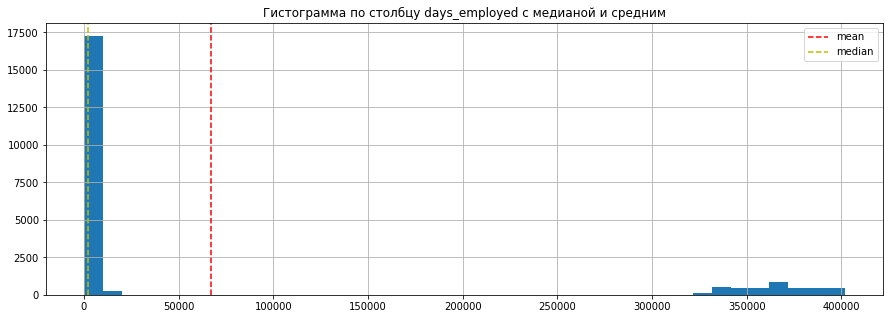

In [32]:
#Код ревьюера
import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))

ax = data['days_employed'].hist(bins = 40)

ax.axvline(x = data['days_employed'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = data['days_employed'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Гистограмма по столбцу days_employed с медианой и средним')
plt.show()

## Расчеты перед выводом

Создадим таблицу, где будет видна средняя доля должников для каждого из условий. Для удобства перееименуем строки для первого условия в "Дети", для 2,3,4 в "Семья", "Доход" и "Цель" соответственно.

In [29]:
conclusion = pd.DataFrame([[pivot_children['Доля должников'].mean()],
                          [ pivot_family_status['Доля должников'].mean()],
                          [ pivot_total['Доля должников'].mean()],
                          [pivot_purpose['Доля должников'].mean()]],
index = ['Дети','Семья','Доход','Цель'],
columns = ['Доля должников'])
print(conclusion)

       Доля должников
Дети         0.073618
Семья        0.080654
Доход        0.077333
Цель         0.084419


Рассчитаем среднее значение доли должников по всем категориям:

In [30]:
conclusion['Доля должников'].mean()

0.07900590438928098

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

На основе данных о статистике платёжеспособности клиентов, данных нам заказчиком, проведя работу по предобработке данных, 
мы исследоввали зависимость 4 критериев на возврат кредита в срок:
1. Количество детей
2. Семейное положение
3. Уровень дохода
4. Цель кредита

Проведя данное исследование, можно сделать вывод:
1. Каждый из критериев влияет на возврат кредита в срок в большей или меньшей степени.
2. Доля должников по каждой категории не превышает 10 %, что указывает на надежность заемщиков.
3. Среднее значение доли должников банка по всем категориям составляет всего 8%, что говорит об ответственном отношении клиентов банка к финансам.
4. Пересмотреть градацию по доходам для получения более сбалансированной выдержки.